In [1]:
from shapely.geometry import Polygon, box, Point
import geopandas as gpd

# global GeoDataFrame
path = gpd.datasets.get_path("naturalearth_lowres")
df = gpd.read_file(path).set_index("name")

# Europe GeoSeries
eur_window = box(-10.67, 34.5, 31.55, 71.05)
eur = df.intersection(eur_window) # intersects difference?
eur = eur[~eur.is_empty] # why filter?

<AxesSubplot:>

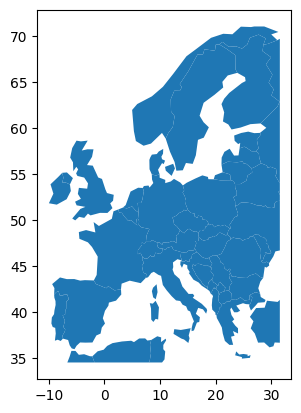

In [8]:
eur.plot()

In [4]:
df.intersection(eur_window)

name
Fiji                                                            POLYGON EMPTY
Tanzania                                                        POLYGON EMPTY
W. Sahara                                                       POLYGON EMPTY
Canada                                                          POLYGON EMPTY
United States of America                                        POLYGON EMPTY
                                                  ...                        
Serbia                      POLYGON ((18.82984 45.90888, 19.59604 46.17173...
Montenegro                  POLYGON ((19.80161 42.50009, 19.73805 42.68825...
Kosovo                      POLYGON ((20.52295 42.21787, 20.28375 42.32026...
Trinidad and Tobago                                             POLYGON EMPTY
S. Sudan                                                        POLYGON EMPTY
Length: 177, dtype: geometry

In [6]:
df.intersection(eur_window).is_empty

name
Fiji                         True
Tanzania                     True
W. Sahara                    True
Canada                       True
United States of America     True
                            ...  
Serbia                      False
Montenegro                  False
Kosovo                      False
Trinidad and Tobago          True
S. Sudan                     True
Length: 177, dtype: bool

In [5]:
df.intersects(eur_window)

name
Fiji                        False
Tanzania                    False
W. Sahara                   False
Canada                      False
United States of America    False
                            ...  
Serbia                       True
Montenegro                   True
Kosovo                       True
Trinidad and Tobago         False
S. Sudan                    False
Length: 177, dtype: bool

/tmp/ipykernel_1121245/1089923979.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid.plot(ax=ax)


<AxesSubplot:>

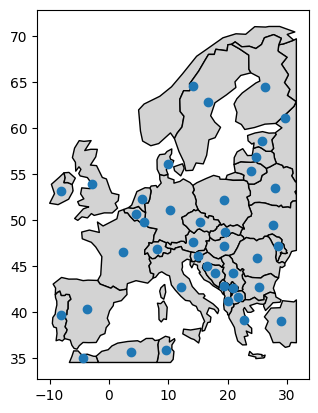

In [14]:
# plot the centroids
ax = eur.plot(facecolor="lightgray", edgecolor="k")
eur.centroid.plot(ax=ax)

In [15]:
eur.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
eur2 = eur.to_crs("EPSG:3035")
eur2.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

<AxesSubplot:>

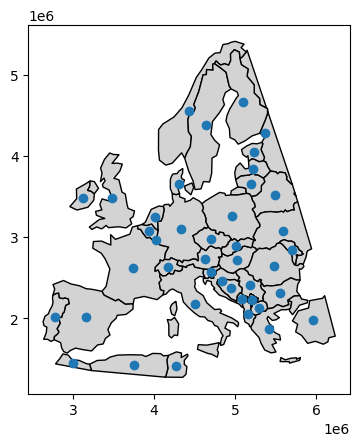

In [17]:
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax)

# how much error does long/lat for computation introduce?

/tmp/ipykernel_1121245/2170279601.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid.to_crs("EPSG:3035").plot(ax=ax, color="r")  # red => miscalculated


<AxesSubplot:>

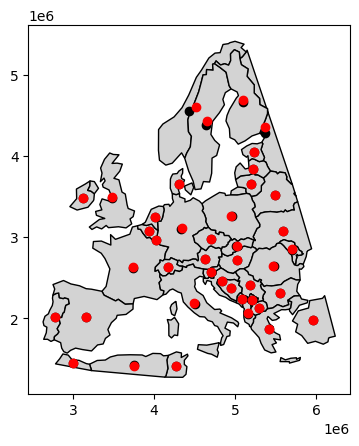

In [21]:
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax, color="k") # black => correct
eur.centroid.to_crs("EPSG:3035").plot(ax=ax, color="r")  # red => miscalculated

In [27]:
#type(eur2.iloc[0])
#type(eur2).__mro__

In [28]:
eur2.area # area in sq meters

name
Russia              2.024604e+11
Norway              3.286343e+11
France              5.595585e+11
Tunisia             6.547702e+10
Algeria             2.043067e+11
Sweden              4.505641e+11
Belarus             2.039346e+11
Ukraine             2.857955e+11
Poland              3.103969e+11
Austria             8.506301e+10
Hungary             9.247413e+10
Moldova             3.232099e+10
Romania             2.383473e+11
Lithuania           6.382974e+10
Latvia              6.392371e+10
Estonia             4.467593e+10
Germany             3.574253e+11
Bulgaria            1.102150e+11
Greece              1.319524e+11
Turkey              2.217875e+11
Albania             2.969486e+10
Croatia             5.752945e+10
Switzerland         4.618538e+10
Luxembourg          2.416819e+09
Belgium             3.012566e+10
Netherlands         4.002133e+10
Portugal            9.340841e+10
Spain               5.023083e+11
Ireland             5.845217e+10
Italy               3.150991e+11
Denma

In [31]:
# what is the area in sq miles?
# careful!  some countries (e.g., Russia) were cropped when we did intersection
(eur2.area / 1000 / 1000 / 2.59).sort_values(ascending=False)

name
France              216045.735320
Spain               193941.416516
Sweden              173962.955903
Germany             138002.030052
Finland             131750.182704
Norway              126885.828356
Italy               121659.867544
Poland              119844.344075
Ukraine             110345.741832
United Kingdom       96519.589998
Romania              92025.972522
Turkey               85632.236650
Algeria              78882.882393
Belarus              78739.245551
Russia               78170.023756
Greece               50946.870966
Bulgaria             42554.046136
Portugal             36065.021674
Hungary              35704.295877
Austria              32842.862855
Czechia              31354.126319
Serbia               29493.813018
Tunisia              25280.702563
Latvia               24680.969176
Lithuania            24644.688797
Ireland              22568.405096
Croatia              22212.141886
Bosnia and Herz.     19538.365073
Slovakia             18172.796262
Switzerla

In [34]:
# eur.area # area on screen, not real area

# Cool Map of Madison

In [39]:
city = gpd.read_file("City_Limit.zip").to_crs("epsg:32616")

In [40]:
city.crs

<Derived Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(city.crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(city.crs)
police = gpd.read_file("Police_Stations.zip").to_crs(city.crs)

In [57]:
url = "https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA/MapServer/2/query?outFields=*&where=1%3D1&f=geojson"
police2 = gpd.read_file(url).to_crs(city.crs)

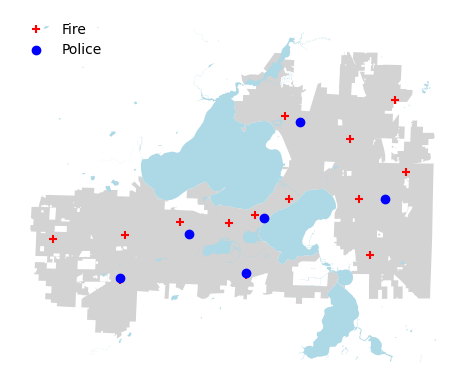

In [58]:
ax = city.plot(color="lightgray")
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", ax=ax, marker="+", label="Fire")
police2.plot(color="blue", ax=ax, label="Police")
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()

In [59]:
fire.to_file("fire.geojson")

# Geocoding: address => lat/lon

In [60]:
import requests
url = "https://www.cityofmadison.com/fire/daily-reports"
r = requests.get(url)
r

<Response [200]>

In [61]:
r.raise_for_status() # give me an exception if not 200 (e.g., 404)

In [65]:
# import pandas as pd
# pd.read_html(url)

In [62]:
print(r.text)

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>
  <link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="Generator" content="Drupal 7 (http://drupal.org)" />
<link rel="canonical" href="/fire/daily-reports" />
<link rel="shortlink" href="/node/31440" />
<meta about="/fire" typeof="skos:Concept" property="rdfs:label skos:prefLabel" content="Fire" />
<link rel="shortcut icon" href="https://www.cityofmadison.com/sites/default/files/template/favicon.ico" type="image/vnd.microsoft.icon" />
    <

In [71]:
import re
addrs = re.findall(r'<span itemprop="streetAddress">(.*?)</span>', r.text)[:-1]
addrs = pd.Series(addrs)
addrs

0                   E. Geneva Circle
1      700 block N. Fair Oaks Avenue
2            2900 block Turbot Drive
3         4200 block Doncaster Drive
4    S. Stoughton Road & Pflaum Road
5            10 block Langdon Street
6              1000 E Washington Ave
7                 3700 Lexington Ave
8         5300 block Congress Avenue
9          6500 block Schroeder Road
dtype: object

In [73]:
gpd.tools.geocode("E. Geneva Circle; Madison, WI")

,geometry,address
0,POINT (-89.51543 43.06922),"East Geneva Circle, 53717, Madison, Wisconsin,..."


In [74]:
gpd.tools.geocode("700 block N. Fair Oaks Avenue; Madison, WI")

,geometry,address
0,GEOMETRYCOLLECTION EMPTY,None


In [79]:
fixed_addrs = addrs.str.replace(" block ", " ") + "; Madison, WI"
fixed_addrs

0                   E. Geneva Circle; Madison, WI
1            700 N. Fair Oaks Avenue; Madison, WI
2                  2900 Turbot Drive; Madison, WI
3               4200 Doncaster Drive; Madison, WI
4    S. Stoughton Road & Pflaum Road; Madison, WI
5                  10 Langdon Street; Madison, WI
6              1000 E Washington Ave; Madison, WI
7                 3700 Lexington Ave; Madison, WI
8               5300 Congress Avenue; Madison, WI
9                6500 Schroeder Road; Madison, WI
dtype: object

In [83]:
incidents = gpd.tools.geocode(fixed_addrs, provider="nominatim", user_agent="cs320bot").dropna()
incidents

,geometry,address
0,POINT (-89.51543 43.06922),"East Geneva Circle, Sauk Creek, Madison, Dane ..."
1,POINT (-89.33070 43.10797),"700, North Fair Oaks Avenue, Madison, Dane Cou..."
2,POINT (-89.41791 43.02961),"2900, Turbot Drive, Leopold, Madison, Dane Cou..."
3,POINT (-89.44376 43.03616),"4200, Doncaster Drive, Marlborough Heights, Ma..."
5,POINT (-89.38982 43.07870),"10, Langdon Street, Mansion Hill, Madison, Dan..."
6,POINT (-89.37127 43.08356),"1000, East Washington Avenue, Marquette, Madis..."
7,POINT (-89.32250 43.11066),"3700, Lexington Avenue, Madison, Dane County, ..."
8,POINT (-89.28428 43.13937),"Congress Avenue, Burke, Madison, Dane County, ..."
9,POINT (-89.49283 43.04637),"6500, Schroeder Road, Madison, Dane County, Wi..."


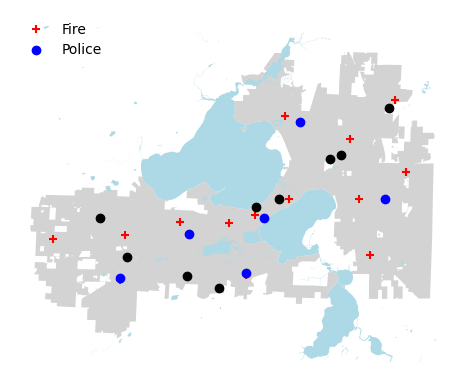

In [85]:
ax = city.plot(color="lightgray")
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", ax=ax, marker="+", label="Fire")
police2.plot(color="blue", ax=ax, label="Police")
incidents.to_crs(city.crs).plot(ax=ax, color="k")
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()